We begin with setting up our program,

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pandas - used to perform data manipulation and analysis

numpy - used to perform a wide variety of mathematical operations on arrays

matplotlib - used for data visualization and graphical plotting

seaborn - built on top of matplotlib with similar functionalities

warnings - to manipulate warnings details

In [4]:
df = pd.read_csv('Iris.csv')

We load the dataset and start exploring the data.

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We see that the data frame comprises of 150 rows x 5 columns. With none of the columns having any null entries. Therefore we can diretly proceed with preprocessing the data.

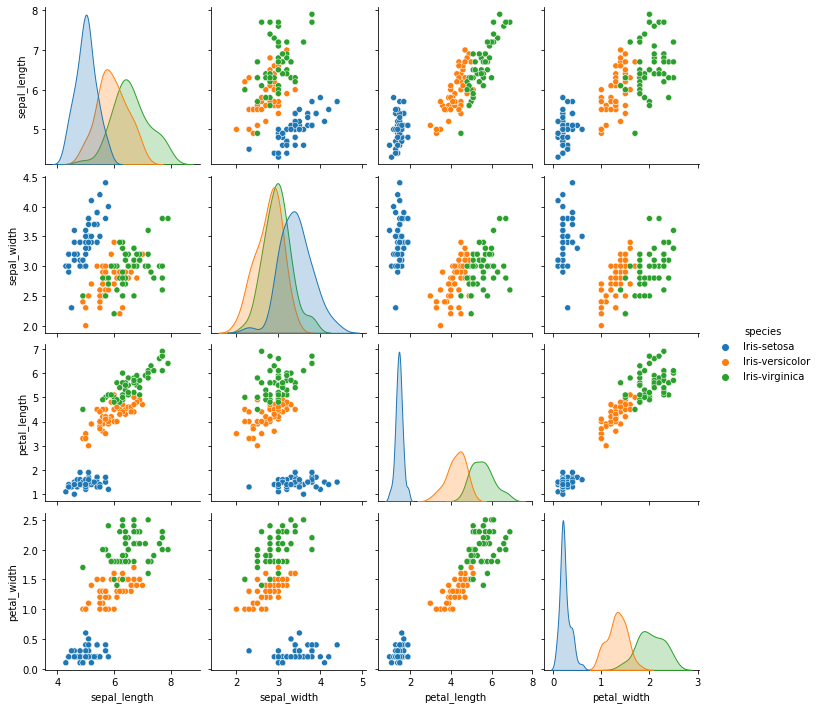

In [8]:
sns.pairplot(df, hue='species')

We can see that the first species Iris setosa is linearly seperable from the other two. While the third species Iris virginica is the longest and widest among the three species.

In [12]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = df[feature_columns].values
y = df['species'].values

We define the features we need and spilt the data into two arrays, X & Y. After which we use label encoder for getting rid of any string labels which KNN models don't accept.

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

We use Parallel Coordinates Plot to confirm our initial hypothesis about the data. 

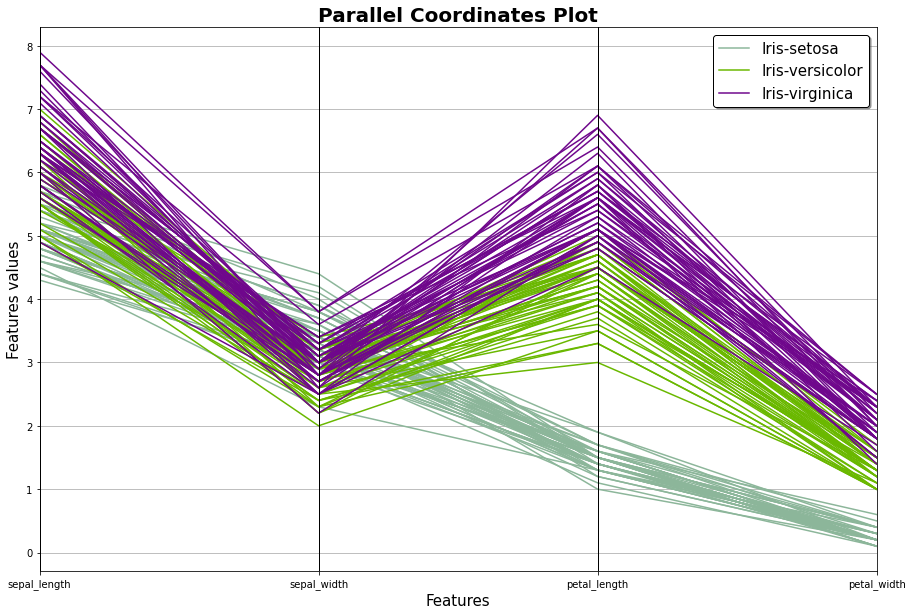

In [18]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df, 'species')
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

Now the preprocessing has been done, let's perform the model training and testing. Here we split the data into two splits i.e., Train and Test. With the Train:Test ratio being at 74:26.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.26, random_state = 0)

Let's start with a Logistic Regression model:

In [51]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()
Log.fit(X_train, y_train)
y_pred = Log.predict(X_test)

Having trained and fit the model. We check the accuracy of our model:

In [56]:
accuracy = Log.score(X_test, y_test)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 97.44 %.


We see that we got quite a good accuracy with such a simple model. Let's carry on and see if we can improve upon this using other models.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy2, 2)) + ' %.')

Accuracy of our model is equal 97.44 %.


We get the same accuracy result. I am getting the indication that this might be the max accuracy possible from the dataset. Let's verify this using cross validation for parameter tuning.

In [68]:
from sklearn.model_selection import cross_val_score
# creating list of K for KNN
k_list = list(range(1,50))
# creating list of cv scores
cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

Now we calculate misclassification error and plot it to the number of neighbours.

<Figure size 432x288 with 0 Axes>

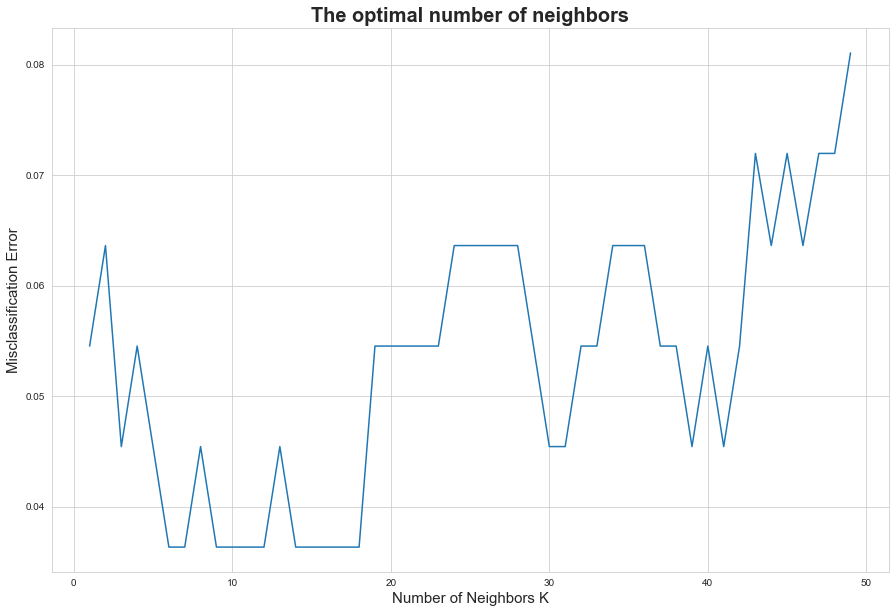

In [69]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

Now let's find the optimum number of neoghbours.

In [70]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 6.


Let's try out a KNN model with 6 neighbours.

In [71]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy2, 2)) + ' %.')

Accuracy of our model is equal 97.44 %.


And therefore, we confirm our suspicions that we were at the most optimal model with an accuracy of 97.44%.